<a href="https://colab.research.google.com/github/guilhembr/Pr-dire-les-consommations-lectriques/blob/main/PElec_01_Nettoyage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context
To achieve the goal of a carbon-neutral city by 2050, the City of Seattle is taking a close look at emissions from non-housing buildings.

Careful surveys were conducted in 2015 and 2016. However, these surveys are expensive to obtain, and from those already conducted, we must attempt to predict the CO2 emissions and total energy consumption of buildings for which they have not yet been measured.

____

In this first part, we will perform a short exploratory analysis after cleaning the data if needed. The goal will be to determine the relevant variables or to create new ones (feature engineering).

#Table of contents

In [ ]:
# !pip install pandas
# !pip install numpy --upgrade
# !pip install --upgrade matplotlib
# !pip install seaborn --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline
sns.set_theme

#Affichage avec le style seaborn
plt.style.use('bmh')

#1 - Import of survey data

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Racine = "/content/drive/MyDrive/Colab Notebooks/3_Projets OC/"

data_path = Racine + "Projet 4/raw_data/archive/2015-building-energy-benchmarking.csv"

df15 = pd.read_csv(data_path, sep=",", encoding="UTF-8")

Mounted at /content/drive


In [ ]:
Racine = "/content/drive/MyDrive/Colab Notebooks/3_Projets OC/"

data_path = Racine + "Projet 4/raw_data/archive/2016-building-energy-benchmarking.csv"

df16= pd.read_csv(data_path, sep=",", encoding="UTF-8")

In [ ]:
df15.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [ ]:
df16.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


After having visualized the first rows of these 2 datasets, we already notice that the columns are not identical. Let's identify the differences:


##1.1 - Columns comparison

In [ ]:
def compare_colums(df1,df2):
    columns_1 = list(df1.columns) 
    columns_2 = list(df2.columns)
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col not in columns_1:
          diff_columns_2.append(col)
        else:
            same_columns.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2

In [ ]:
diff_columns_15, diff_columns_16 = compare_colums(df15,df16)

diff_columns_15

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [ ]:
diff_columns_16

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

The location data has evolved between 2015 and 2016. The address, the city and the GPS location have been segmented into `Latitude` and `Longitude`. Some other variables like `GHGEmissions(MetricTonsCO2e)` have changed their name (we will have to check if the magnitude of the data has changed compared to
`TotalGHGEmissions` of 2016).


##1.2 - Location_2015 split

Notice that the location data for the 2015 dataset is "compacted" into a sort of double dictionary. So we will work this variable to extract each of the nested variables:

In [ ]:
df15['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [ ]:
import ast
df15['Location'] = [ast.literal_eval(str(item)) for index, item in df15.Location.iteritems()]

In [ ]:
df15['Location']

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

In [ ]:
df15 = pd.concat([df15.drop(['Location'], axis=1), df15['Location'].apply(pd.Series)], axis=1)

In [ ]:
df15.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,human_address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE""..."
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ..."
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"",..."
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,"{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE..."
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE""..."


In [ ]:
df15['human_address'] = [ast.literal_eval(str(item)) for index, item in df15.human_address.iteritems()]

In [ ]:
df15.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,human_address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,"{'address': '405 OLIVE WAY', 'city': 'SEATTLE'..."
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,"{'address': '724 PINE ST', 'city': 'SEATTLE', ..."
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,"{'address': '1900 5TH AVE', 'city': 'SEATTLE',..."
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,"{'address': '620 STEWART ST', 'city': 'SEATTLE..."
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,"{'address': '401 LENORA ST', 'city': 'SEATTLE'..."


In [ ]:
df15 = pd.concat([df15.drop(['human_address'], axis=1), df15['human_address'].apply(pd.Series)], axis=1)

In [ ]:
df15.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


We now have the columns corresponding to those of 2016: latitude, longitude, address, city, state and zip. Let's rename them in the same way:

In [ ]:
df15 = df15.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

Then let's look again at the column differences between the 2 dataframes:

In [ ]:
diff_columns_15, diff_columns_16 = compare_colums(df15,df16)
print(diff_columns_15, diff_columns_16)

['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'] ['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


In [ ]:
diff_columns_16

['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [ ]:
print(f"Description of the variable TotalGHGEmissions 2016 : \n\n",df16['TotalGHGEmissions'].describe(),
     f"\n\nDescription of the variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n", df15['GHGEmissions(MetricTonsCO2e)'].describe())

Description of the variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 

Description of the variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


The magnitudes of the 2 variables are similar between 2015 and 2016. We will therefore only rename the columns identically. We also delete the 2015 columns that have no equivalent in 2016:

In [ ]:
df15 = df15.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})
df15.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1, inplace=True)

In [ ]:
diff_columns_15, diff_columns_16 = compare_colums(df15,df16)
print(diff_columns_15, diff_columns_16)

[] []


The variables of the 2 datasets being now identical, we will be able to group them in a single dataset :

In [ ]:
data = pd.concat([df15[df16.columns],df16], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
data.shape

(6716, 46)

##1.3 - Cleansing

It is specified in the project that only buildings **not** intended for habitation will be studied. We will therefore delete all the lines corresponding to dwellings based on the `BuildingType` variable:

In [ ]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [ ]:
data = data[~data['BuildingType'].str.contains("Multifamily")] #tilde in python means bitwise not, inversing boolean mask
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [ ]:
print("The dataset now has {} lines and {} columns.".format(data.shape[0],data.shape[1]))

The dataset now has 3318 lines and 46 columns.


We will also look for duplicates on the OSEBuildingID. Indeed, our models will have to be based on a single building (it is not a temporal model). We will therefore take the last available value of the variables over the 2 years. 

- *It is preferred to the mean of both years values because we have not split our dataset into training and testing sets yet. This is the reason why we should not compute any arithmetical operations on the complete population of the dataset.*

In [ ]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,DOWNTOWN,47.61334897,-122.33769944,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Yes,NaN,Compliant,NaN,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,DOWNTOWN,47.61421585,-122.33660889,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,No,NaN,Compliant,High Outlier,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,DOWNTOWN,47.6137544,-122.3409238,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,No,NaN,Compliant,NaN,507.70,4.02


In [ ]:
data.groupby('DataYear').count()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
DataYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,1650,1650,1650,1650,1650,1650,1650,1650,1649,1650,1650,1650,1650,1650,1650,1642,1650,1650,1650,1589,1585,1585,812,812,331,331,90,1117,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1649,12,1650,31,1643,1643
2016,1668,1668,1668,1668,1668,1668,1668,1652,1668,1668,1668,1668,1668,1668,1666,1668,1668,1668,1668,1666,1662,1662,855,855,353,353,98,1094,1665,1665,1666,1666,1666,1665,1666,1666,1666,1666,1666,1668,0,1668,17,1666,1666


Let's keep only the last available value per OSEBuilding ID (the most recent as it is the most relevant regarding potential improvements of building features). 

In [ ]:
data = data.sort_values('DataYear', ascending=False).drop_duplicates(['OSEBuildingID'])

In [ ]:
data.shape

(1698, 46)

In [ ]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
10,15,2016,NonResidential,Hotel,Hotel Monaco Seattle,1101 4th Avenue,Seattle,WA,98101,0942000145,7,DOWNTOWN,47.6069,-122.334,1969,1.0,11.0,153163,19279,133884,Hotel,Hotel,133884.0,NaN,NaN,NaN,NaN,NaN,30.0,119.599999,124.300003,228.199997,233.000000,16016644.0,1.664693e+07,5237165.5,1813489.875,6187627.0,45918.500000,4591850.0,False,NaN,Compliant,NaN,691.26,4.51
580,777,2016,NonResidential,University,Hospital Central Services Laundry,800 13th Ave,Seattle,WA,98122,2254500945,3,CENTRAL,47.6094,-122.315,1916,1.0,2.0,60122,0,60122,"College/University, Parking",College/University,60122.0,Parking,0.0,NaN,NaN,NaN,NaN,11.500000,12.400000,32.700001,35.599998,690529.5,7.458303e+05,0.0,173807.000,593029.0,974.999878,97500.0,False,NaN,Compliant,NaN,9.31,0.15
572,766,2016,NonResidential,Large Office,1200 3rd Ave,1200 3rd Ave,Seattle,WA,98104,1975200015,7,DOWNTOWN,47.6074,-122.336,1921,1.0,13.0,189175,0,189175,"Office, Other",Office,151740.0,Other,12645.0,NaN,NaN,NaN,13.0,115.800003,115.800003,363.600006,363.600006,19036416.0,1.903642e+07,0.0,5579253.500,19036413.0,0.000000,0.0,False,NaN,Compliant,NaN,132.71,0.70
573,767,2016,NonResidential,Large Office,1015 3rd Ave,1015 3rd Ave,Seattle,WA,98104,0939000485,7,DOWNTOWN,47.6058,-122.335,1998,1.0,13.0,293803,74481,219322,"Office, Parking",Office,145491.0,Parking,70603.0,NaN,NaN,NaN,25.0,117.400001,118.699997,368.500000,372.700012,17074142.0,1.726747e+07,0.0,5004144.000,17074139.0,0.000000,0.0,False,NaN,Compliant,NaN,119.03,0.41
574,768,2016,NonResidential,Large Office,1201 Western Avenue,1201 Western Avenue,Seattle,WA,98101,7666202480,7,DOWNTOWN,47.6058,-122.339,1910,1.0,7.0,122356,0,122356,"Data Center, Office, Retail Store",Office,95942.0,Retail Store,15523.0,Data Center,182.0,NaN,91.0,41.099998,41.900002,125.000000,125.800003,4585070.5,4.675882e+06,0.0,1281305.625,4371815.0,2132.549805,213255.0,False,NaN,Compliant,NaN,41.80,0.34


The dataset now has no more duplicates on the `OSEBuildingID` variable.

Now let's look at the dataset info and descriptions :

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 10 to 1720
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1698 non-null   int64  
 1   DataYear                         1698 non-null   int64  
 2   BuildingType                     1698 non-null   object 
 3   PrimaryPropertyType              1698 non-null   object 
 4   PropertyName                     1698 non-null   object 
 5   Address                          1698 non-null   object 
 6   City                             1698 non-null   object 
 7   State                            1698 non-null   object 
 8   ZipCode                          1682 non-null   object 
 9   TaxParcelIdentificationNumber    1698 non-null   object 
 10  CouncilDistrictCode              1698 non-null   int64  
 11  Neighborhood                     1698 non-null   object 
 12  Latitude           

In the visualization above, some variables already appear as redundant:

- `Electricity(kWh)` and `Electricity(kBtu)`,
- `NaturalGas(therms)` and `NaturalGas(kBtu)`
- WN suffixes: "Weather Normalized" - These are measurements normalized with weather conditions. 

For the purpose of our analysis, weather will not be taken into account.
So we will start by removing these variables:

In [ ]:
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

In [ ]:
#Dropping WN variables
data.drop(search_componant(data,'WN'), axis=1, inplace=True)

In [ ]:
#Dropping redundant variables
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
data.drop(redundant_features, axis=1, inplace=True)

We also notice variables suffixed **GFA**: They represent the gross floor area. We therefore keep them for further analysis.

In [ ]:
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1698.000000,1698.000000,1698.000000,1698.000000,1696.000000,1698.000000,1.698000e+03,1698.000000,1.698000e+03,1.686000e+03,866.000000,356.000000,1112.000000,1694.000000,1695.000000,1.695000e+03,1.695000e+03,1.695000e+03,1.695000e+03,1695.000000,1695.000000
mean,16339.776207,2015.982332,4.369258,1961.704947,1.169222,4.101885,1.185002e+05,13130.587750,1.053697e+05,9.882353e+04,36938.481867,14837.537637,65.544065,72.282231,175.837876,8.476349e+06,5.182738e+05,5.850148e+06,1.998808e+06,186.944873,1.607711
std,13811.042261,0.131780,2.191411,32.850343,2.908885,6.516620,2.954638e+05,43234.894667,2.819403e+05,2.754950e+05,69874.595208,36649.017309,28.432810,74.841649,186.211338,3.023379e+07,5.490941e+06,2.071024e+07,9.488313e+06,755.340584,2.335976
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,584.250000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.938300e+04,0.000000,2.831175e+04,2.550000e+04,5325.000000,2626.250000,49.000000,33.525000,76.350002,1.219804e+06,0.000000e+00,7.199750e+05,0.000000e+00,19.870000,0.340000
50%,21161.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.925050e+04,0.000000,4.725100e+04,4.363800e+04,12062.500000,5884.000000,73.000000,51.850000,130.899994,2.551022e+06,0.000000e+00,1.611215e+06,4.965300e+05,49.550000,0.880000
75%,24601.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.050902e+05,0.000000,9.465975e+04,9.200450e+04,31973.250000,12535.250000,89.000000,81.699997,203.900002,6.867819e+06,0.000000e+00,4.821154e+06,1.522622e+06,142.155000,1.890000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


For our modeling purposes, the variables to be predicted are the building's energy consumption (`SiteEnergyUse(kBtu)`) and its CO2 emissions (`TotalGHGEmissions`). Some rows have missing values on these variables, so we will remove them:

In [ ]:
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | (data['TotalGHGEmissions'].isnull()))]


The variable `Comments`, which is also very sparse, can be deleted:


In [ ]:
data.drop("Comments", axis=1, inplace=True)


The variable identifying the outliers can be interesting for our analyses, however, in the documentation, we do not really know what these outliers correspond to. We will therefore delete the lines mentioning these outliers.






In [ ]:
data = data[~data["Outlier"].isnull()==False]
data.drop('Outlier', axis=1, inplace=True)

For now, we will keep the other variables as is. A short exploratory analysis will tell us more about which data to keep.

In [ ]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [ ]:
data.shape

(1676, 39)

#2 - EDA and Feature Engineering

First, we will look at the distribution of the various types of buildings to be studied:

##2.1 - Building types

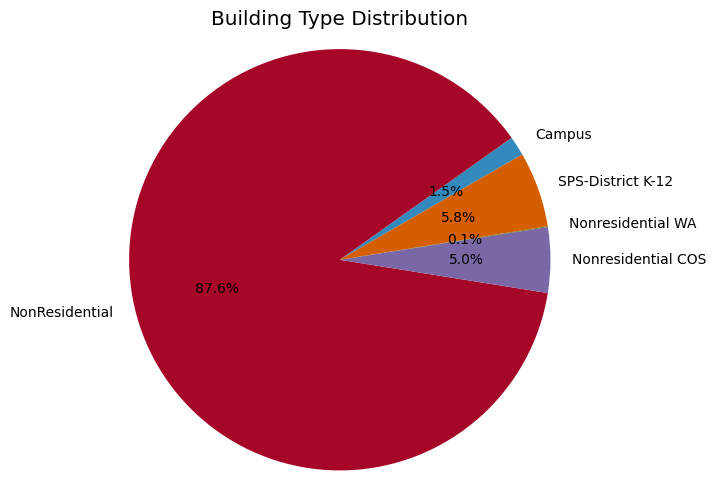

In [ ]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

fig, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', startangle=30)
ax.axis('equal')
ax.set_title("Building Type Distribution")
plt.show()

In [ ]:
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    289
Other                          189
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    92
Hotel                           75
Worship Facility                70
Distribution Center             51
Medical Office                  41
Supermarket / Grocery Store     40
K-12 School                     39
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Non-Refrigerated Warehouse       2
Low-Rise Multifamily             1
Restaurant\n                     1
Name: PrimaryPropertyType, dtype: int64

Here we notice that some categories are duplicates with an escape character (linebreakers). We will correct this problem:

In [ ]:
import re
regex = re.compile(r'[\n\r\t]')
data['PrimaryPropertyType'] = [regex.sub("", item) for index, item in data.PrimaryPropertyType.iteritems()]
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()/data.shape[0]*100

Small- and Mid-Sized Office    17.243437
Other                          11.276850
Warehouse                      10.739857
Large Office                   10.023866
Mixed Use Property              6.085919
Retail Store                    5.489260
Hotel                           4.474940
Worship Facility                4.176611
Distribution Center             3.042959
Medical Office                  2.446301
Supermarket / Grocery Store     2.386635
K-12 School                     2.326969
Self-Storage Facility           1.670644
Residence Hall                  1.252983
Senior Care Community           1.193317
University                      1.014320
Refrigerated Warehouse          0.715990
Restaurant                      0.715990
Hospital                        0.596659
Laboratory                      0.596659
Non-Refrigerated Warehouse      0.119332
Low-Rise Multifamily            0.059666
Name: PrimaryPropertyType, dtype: float64

Small and medium-sized offices account for the largest share of non-residential buildings.

##2.2 - Building dates

Let's look at distributions from Seattle's building years:

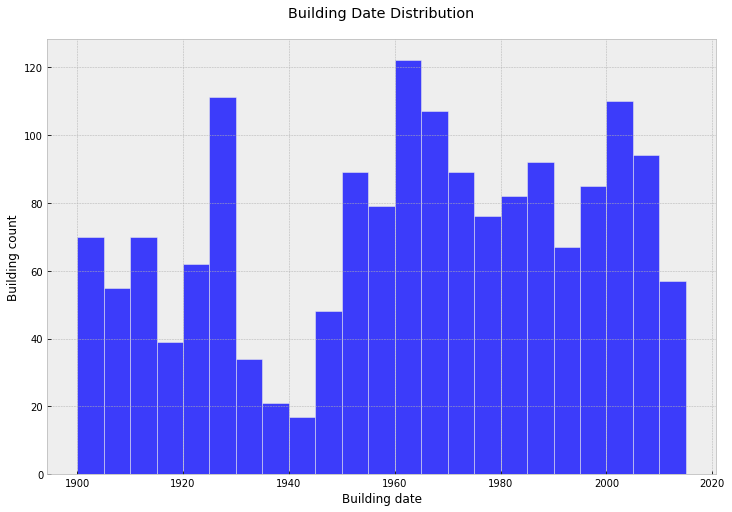

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5))
ax.set_xlabel("Building date")
ax.set_ylabel("Building count")
plt.title(f"Building Date Distribution\n")
plt.show()

Even more interesting than the year of construction, it would be great to analyze the age of the buildings to reduce the dispersion of the data and link the years of the surveys (2015, 2016). 

We will therefore create this new variable and delete the year of construction:

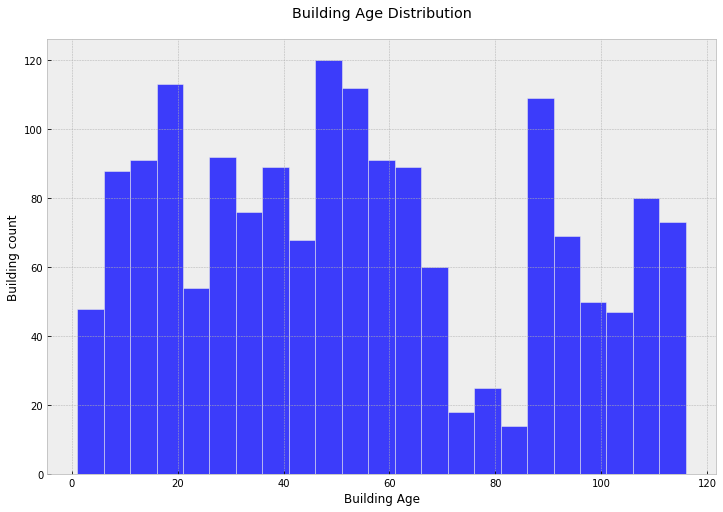

In [ ]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Building Age")
ax.set_ylabel("Building count")
plt.title(f"Building Age Distribution\n")
plt.show()

##2.3 - Linear correlations

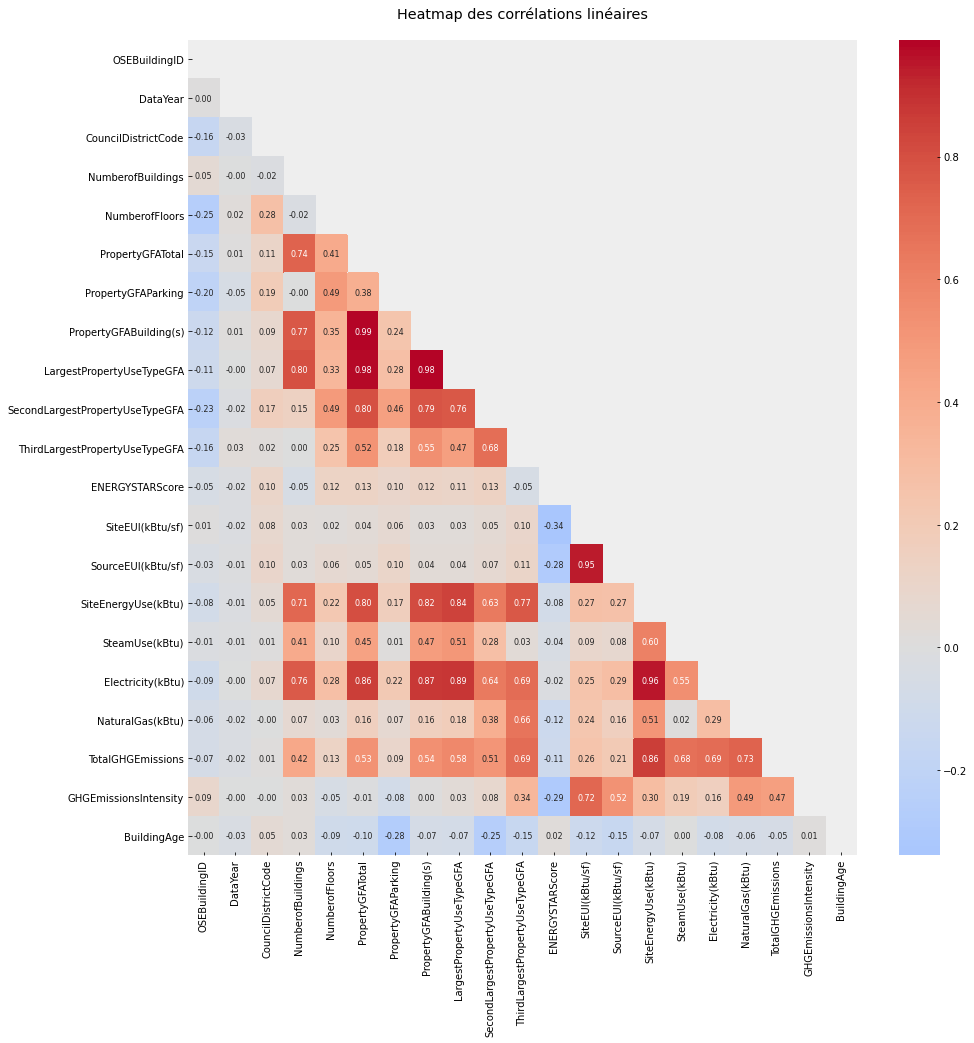

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()


For the predictable variables TotalGHGEmissions and SiteEnergyUse(kBtu), we notice almost similar linear correlations with the survey variables (consumption) which is the direct consequence of data leakage.

In [ ]:
#delete redundant variables
data.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#fill-in missing uses
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna("Unknown")
data['NumberofFloors'] = data['NumberofFloors'].fillna(1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 10 to 1720
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1676 non-null   int64  
 1   DataYear                       1676 non-null   int64  
 2   BuildingType                   1676 non-null   object 
 3   PrimaryPropertyType            1676 non-null   object 
 4   PropertyName                   1676 non-null   object 
 5   Address                        1676 non-null   object 
 6   City                           1676 non-null   object 
 7   State                          1676 non-null   object 
 8   ZipCode                        1660 non-null   object 
 9   TaxParcelIdentificationNumber  1676 non-null   object 
 10  CouncilDistrictCode            1676 non-null   int64  
 11  Neighborhood                   1676 non-null   object 
 12  Latitude                       1676 non-null   

##2.4 - Analysis of target variable

As a reminder, the 2 variables to be predicted in our assignment are:

- `TotalGHGEmissions`
- `SiteEnergyUse(kBtu)`


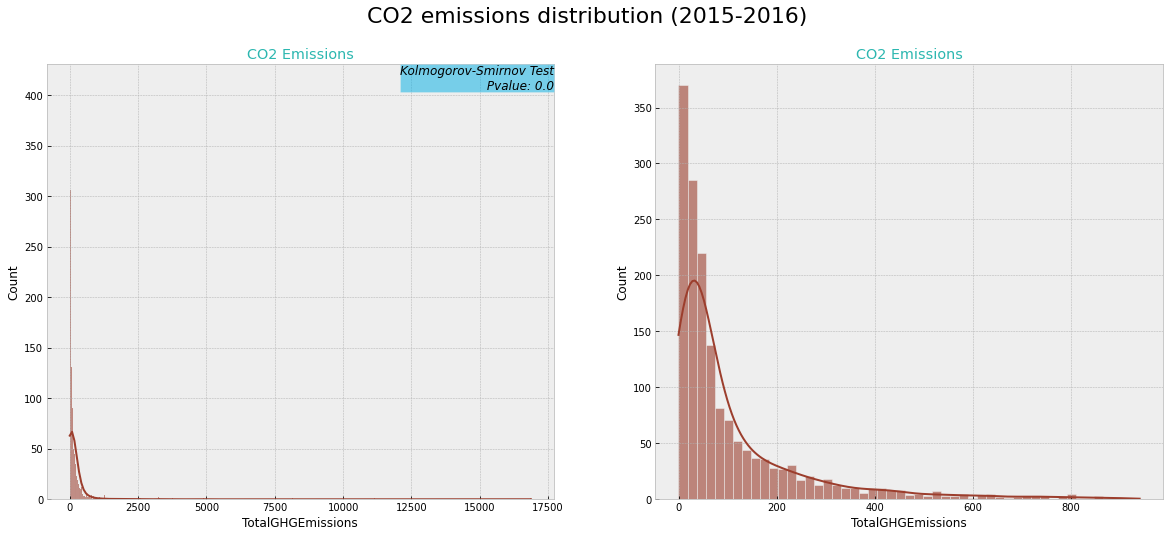

In [ ]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("CO2 Emissions", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Kolmogorov-Smirnov Test\n Pvalue: {:.2}'.format(kstest.pvalue),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("CO2 Emissions", color='#2cb7b0')

plt.suptitle("CO2 emissions distribution (2015-2016)", fontsize=22)
plt.show()

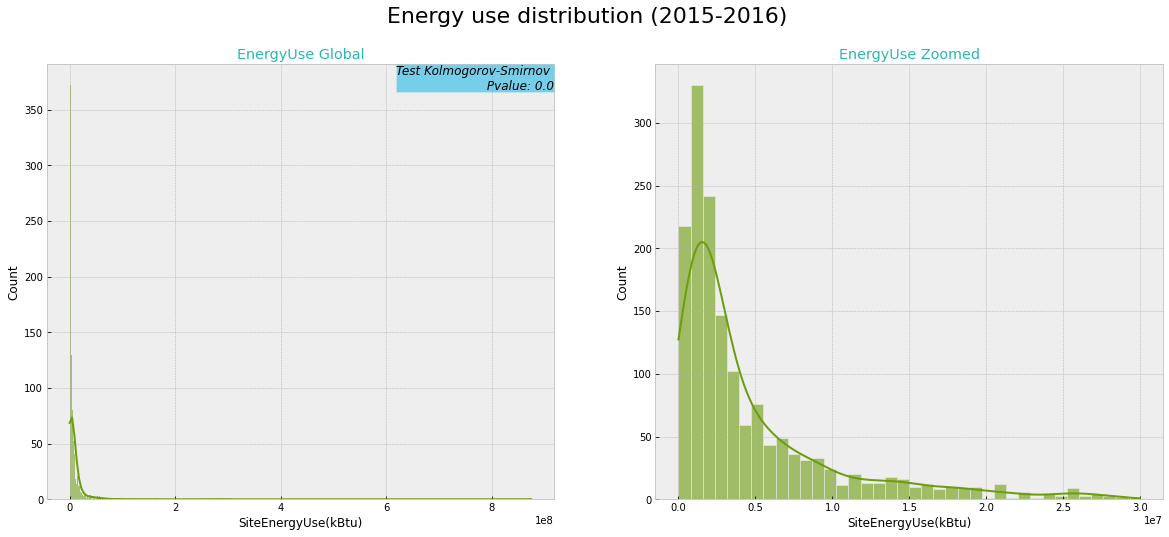

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=data, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("EnergyUse Global", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2}'.format(kstest.pvalue),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("EnergyUse Zoomed", color='#2cb7b0')

plt.suptitle("Energy use distribution (2015-2016)", 
             fontsize=22)
plt.show()

Based on the projections obtained and the results of the Kolmogorov-Smirnov tests (Pvalue < at the 5% test level) we reject the hypothesis of normality of the distributions of these variables.

Let us now project the scatterplots of the distributions of these 2 variables between them


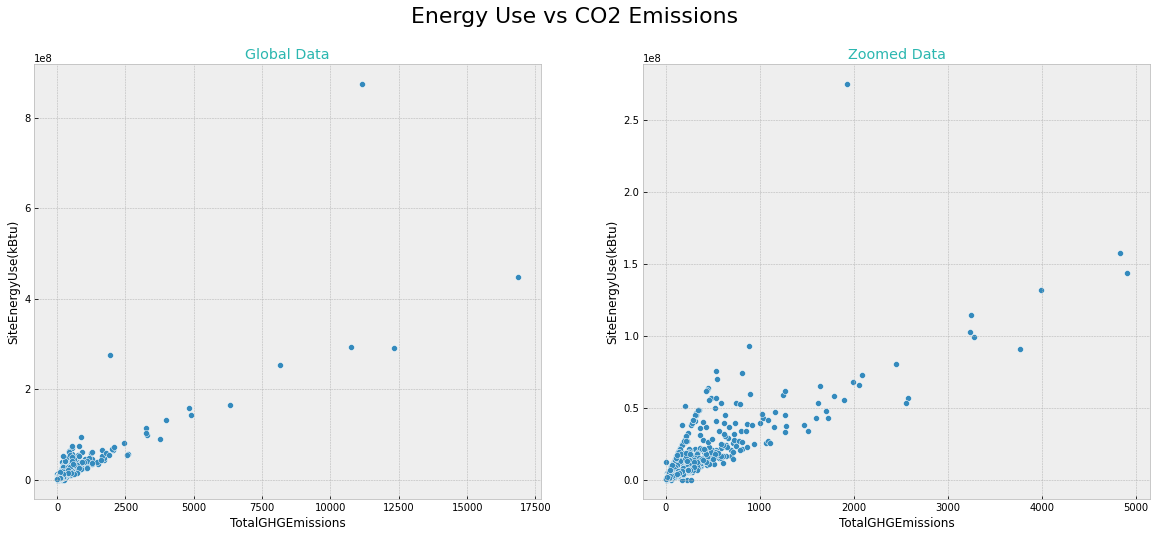

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Global Data", color='#2cb7b0')
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Zoomed Data", color='#2cb7b0')
plt.suptitle("Energy Use vs CO2 Emissions", fontsize=22)
plt.show()

We notice here that the distribution of the CO2 emission data according to the energy consumption does not follow only 1 linear regression line if we zoom on the most represented data.

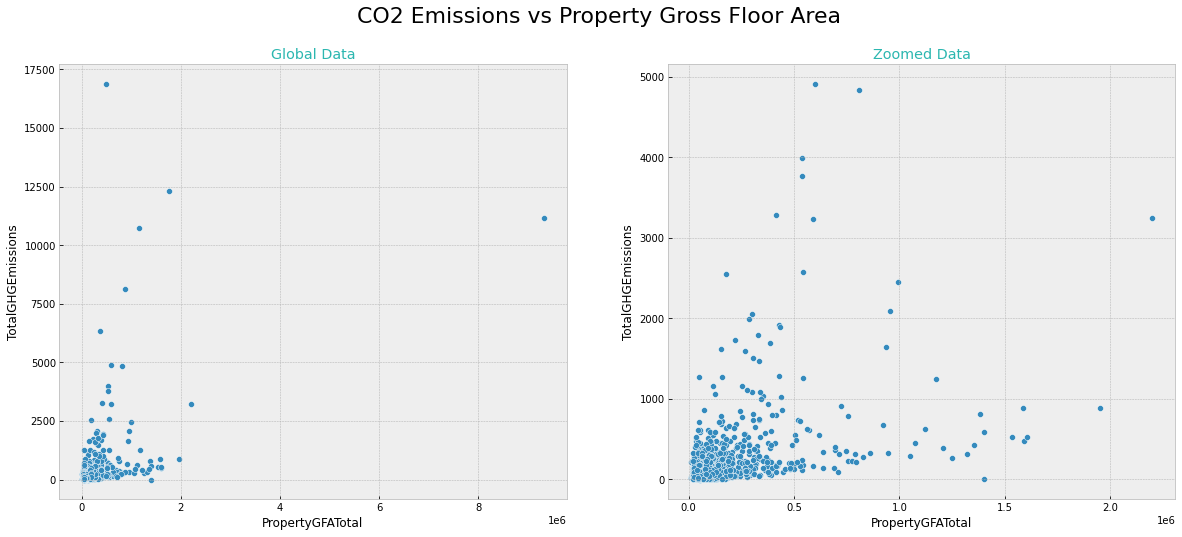

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="PropertyGFATotal", y="TotalGHGEmissions", ax=axes[0])
axes[0].set_title("Global Data", color='#2cb7b0')
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="PropertyGFATotal", y="TotalGHGEmissions", ax=axes[1])
axes[1].set_title("Zoomed Data", color='#2cb7b0')
plt.suptitle("CO2 Emissions vs Property Gross Floor Area", fontsize=22)
plt.show()

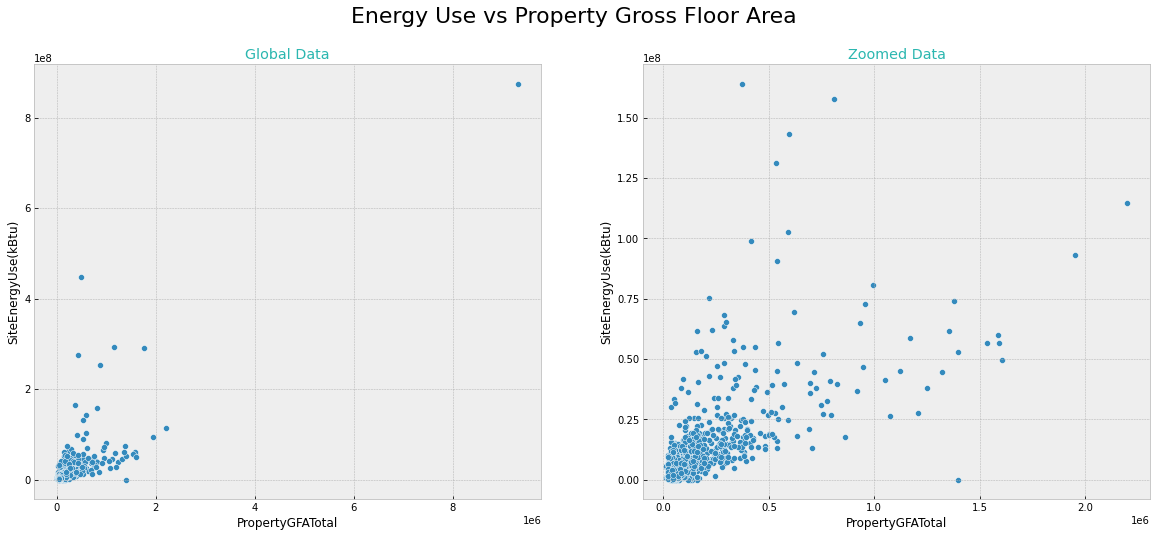

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUse(kBtu)", x="PropertyGFATotal", ax=axes[0])
axes[0].set_title("Global Data", color='#2cb7b0')
sns.scatterplot(data=data[(data['SiteEnergyUse(kBtu)'] < 2E8)], y="SiteEnergyUse(kBtu)", x="PropertyGFATotal", ax=axes[1])
axes[1].set_title("Zoomed Data", color='#2cb7b0')
plt.suptitle("Energy Use vs Property Gross Floor Area", fontsize=22)
plt.show()

Let's now see if the geographical coordinates have an impact on the emissions and consumption. To avoid strong correlations between Latitude and Longitude, we will calculate the Harversine distance between each coordinate point and the center of Seattle :


In [ ]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [ ]:
#Calcul des distance au centre de Seattle pour chaque point
data['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))]

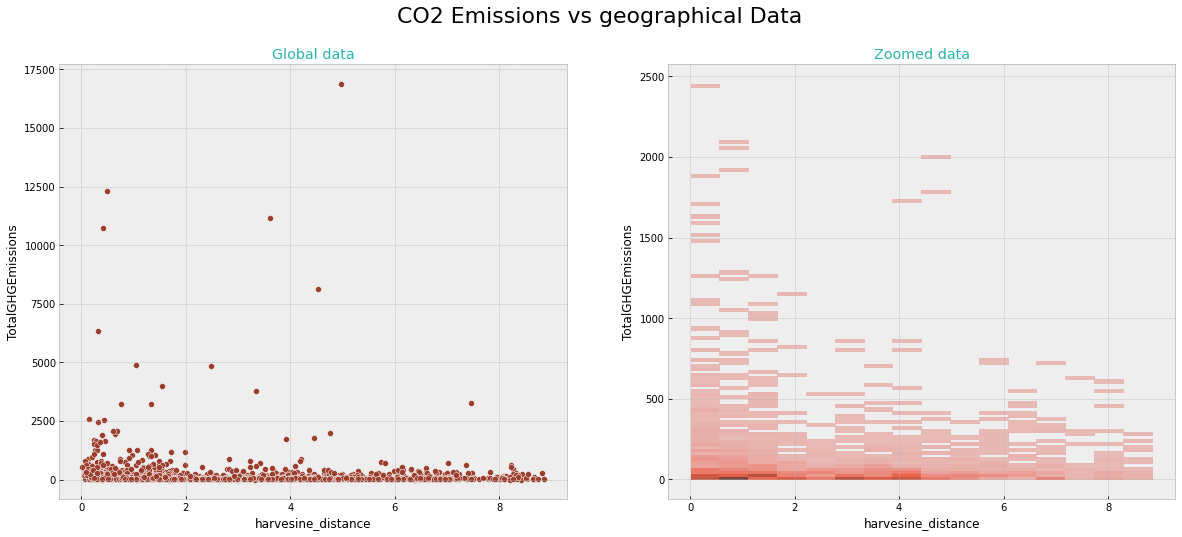

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Global data", color='#2cb7b0')
sns.histplot(data=data[(data['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Zoomed data", color='#2cb7b0')
plt.suptitle("CO2 Emissions vs geographical Data", 
              fontsize=22)
plt.show()

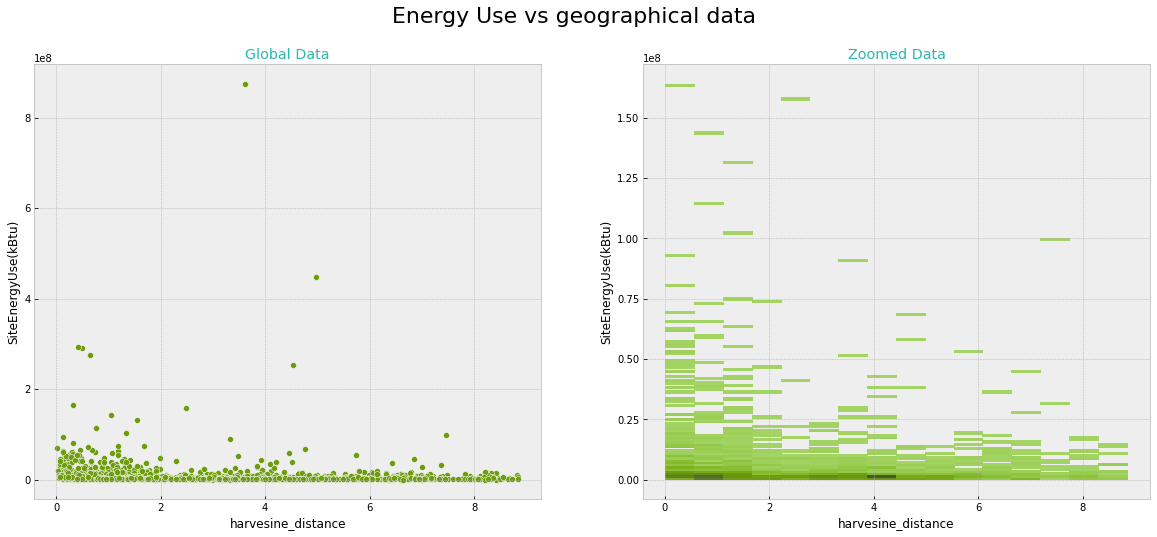

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Global Data", color='#2cb7b0')
sns.histplot(data=data[(data['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Zoomed Data", color='#2cb7b0')
plt.suptitle("Energy Use vs geographical data", 
             fontsize=22)
plt.show()

Looking at these projections, it may be possible that the geographical coordinates (thus the addresses of the buildings) can have an impact on the energy consumption and CO2 emissions.

On the other hand, latitude and longitude being 2 variables strongly correlated in our dataset, we will remove these 2 columns to keep only this single coordinate point Harvesine (at the end of the notebook).

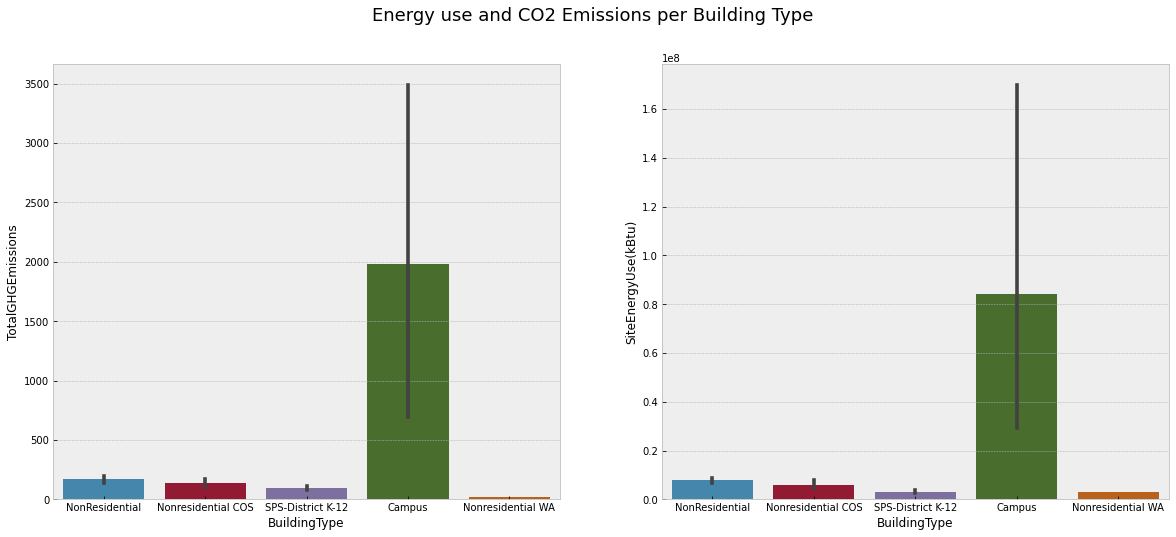

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Energy use and CO2 Emissions per Building Type", 
              fontsize=18)
plt.show()

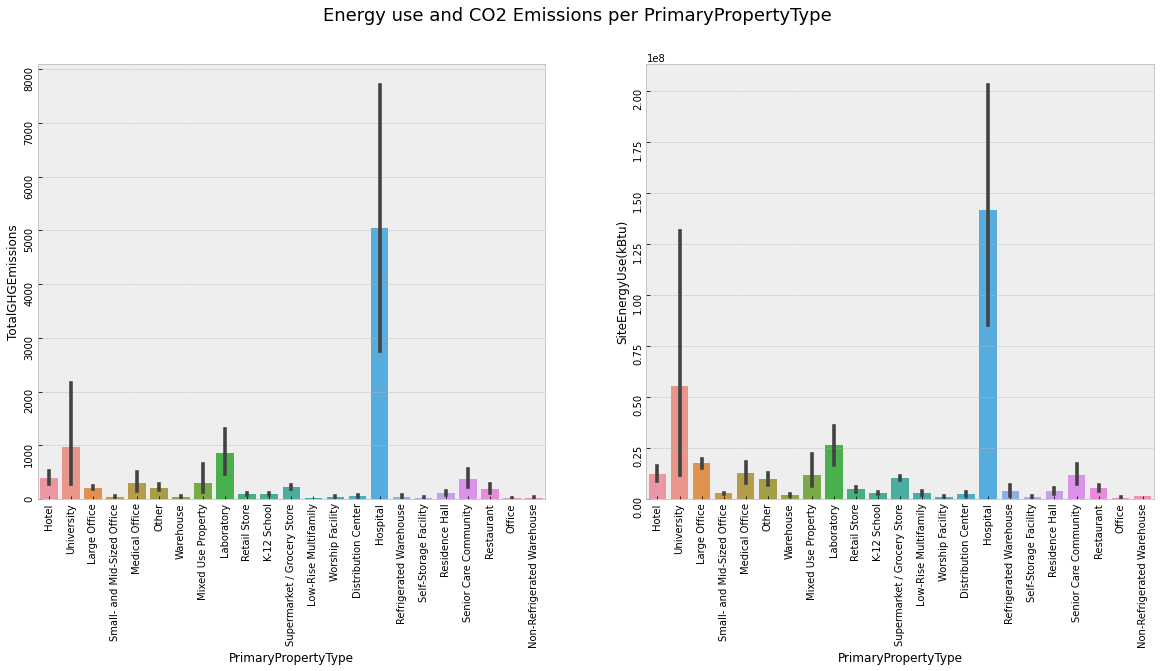

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='PrimaryPropertyType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='PrimaryPropertyType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Energy use and CO2 Emissions per PrimaryPropertyType", 
              fontsize=18)

for axes in fig.axes:
    axes.tick_params(labelrotation=90)

plt.show()

In [ ]:
data['PrimaryPropertyType'].value_counts()/data.shape[0]*100

Small- and Mid-Sized Office    17.482100
Other                          15.155131
Warehouse                      11.157518
Large Office                   10.322196
K-12 School                     8.233890
Mixed Use Property              6.801909
Retail Store                    5.489260
Hotel                           4.474940
Worship Facility                4.176611
Distribution Center             3.162291
Medical Office                  2.505967
Supermarket / Grocery Store     2.386635
Self-Storage Facility           1.670644
University                      1.431981
Residence Hall                  1.252983
Senior Care Community           1.193317
Restaurant                      0.775656
Refrigerated Warehouse          0.715990
Laboratory                      0.596659
Hospital                        0.596659
Office                          0.178998
Non-Refrigerated Warehouse      0.119332
Low-Rise Multifamily            0.119332
Name: PrimaryPropertyType, dtype: float64

On these bar graphs, Hospital and University stand out in terms of consumption and CO2 emissions. 

In [ ]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'BuildingAge', 'harvesine_distance'],
      dtype='object')

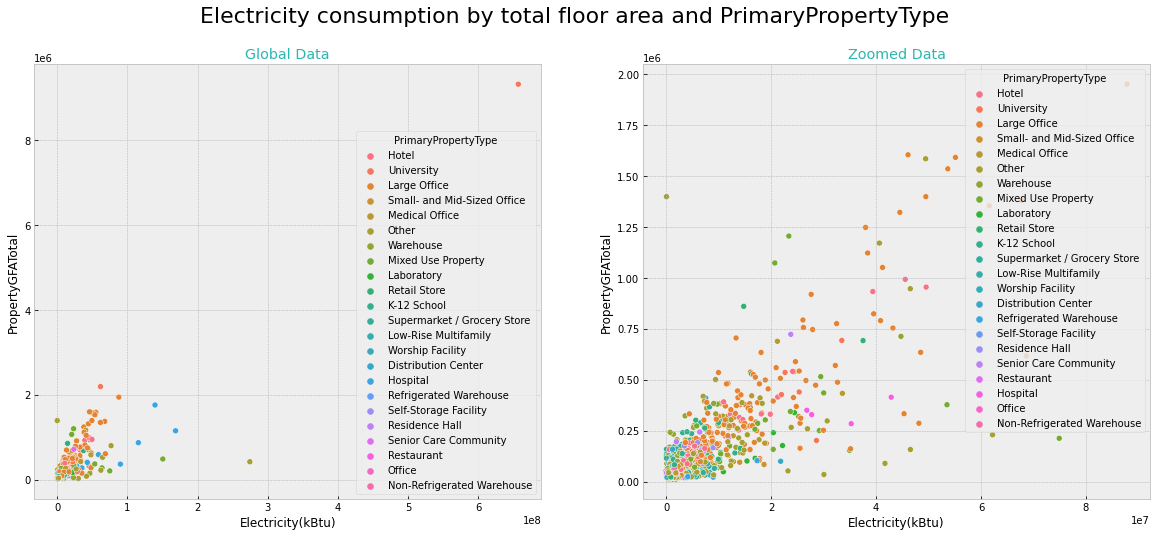

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.scatterplot(data = data, x = 'Electricity(kBtu)', y = 'PropertyGFATotal', hue='PrimaryPropertyType', ax=axes[0])
sns.scatterplot(data = data[data['SiteEnergyUse(kBtu)'] < 1*10**8], x = 'Electricity(kBtu)', y = 'PropertyGFATotal', hue='PrimaryPropertyType', 
                      ax=axes[1])

axes[0].set_title("Global Data", color='#2cb7b0')
axes[1].set_title("Zoomed Data", color='#2cb7b0')

plt.suptitle('Electricity consumption by total floor area and PrimaryPropertyType', 
             fontsize=22)
plt.show()


We delete the outlier identified which could weaken our modeling. 

In [ ]:
outlier_threshold = 0.3*10**8

data[data['Electricity(kBtu)'] > outlier_threshold].shape

(55, 33)

In [ ]:
data = data[data['Electricity(kBtu)'] < outlier_threshold]

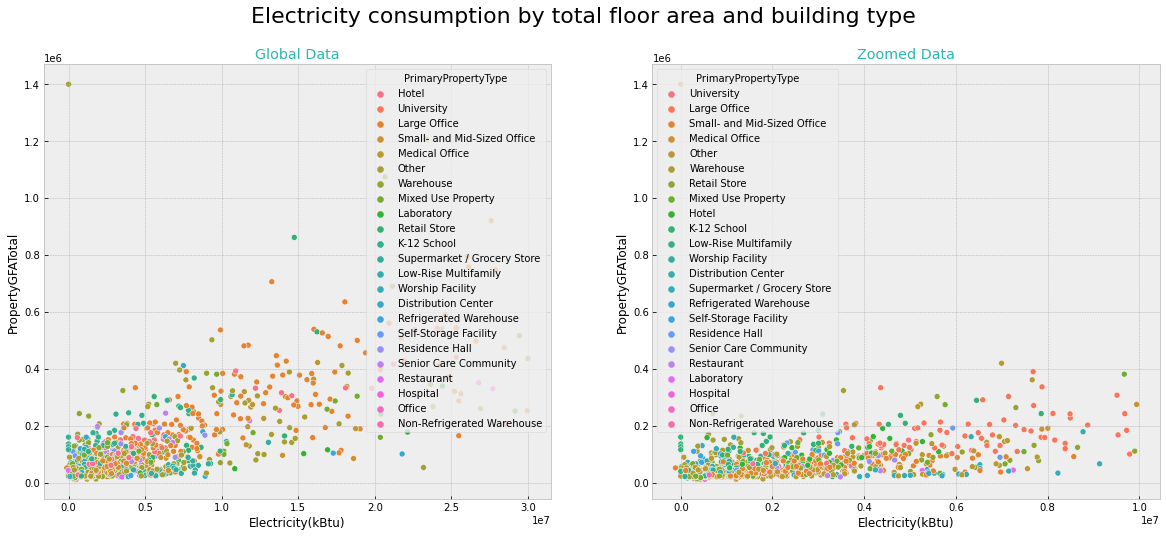

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data = data, x = 'Electricity(kBtu)', y = 'PropertyGFATotal', hue='PrimaryPropertyType', ax=axes[0])
sns.scatterplot(data = data[data['SiteEnergyUse(kBtu)'] < 1*10**7], x = 'Electricity(kBtu)', y = 'PropertyGFATotal', hue='PrimaryPropertyType', 
                      ax=axes[1])

axes[0].set_title("Global Data", color='#2cb7b0')
axes[1].set_title("Zoomed Data", color='#2cb7b0')

plt.suptitle('Electricity consumption by total floor area and building type', 
             fontsize=22)
plt.show()


Now let's see if the age of the buildings has an impact on CO2 emissions:

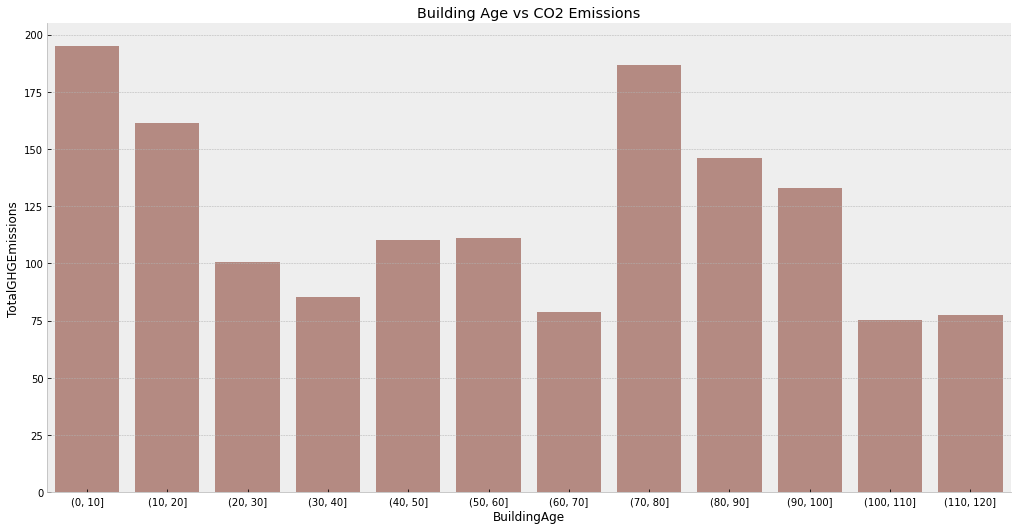

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['BuildingAge'], bins=bins), y="TotalGHGEmissions",
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
plt.title("Building Age vs CO2 Emissions")
plt.show()

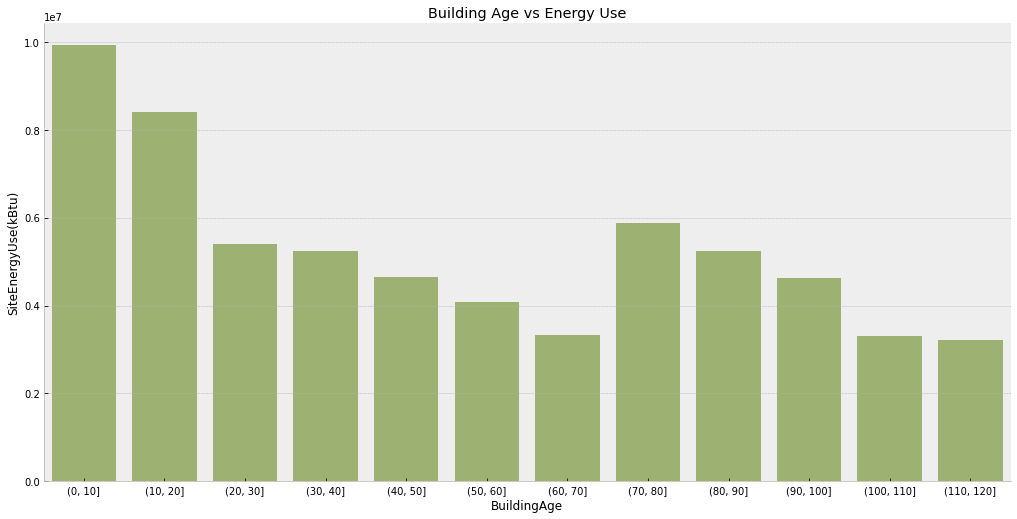

In [ ]:
sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['BuildingAge'], bins=bins), y="SiteEnergyUse(kBtu)",
    ci=None, color="#6D9C0E", alpha=.6,
    height=7, aspect=2
)
plt.title("Building Age vs Energy Use")
plt.show()

Buildings less than 30 years old seem to have higher energy consumption and CO2 emissions than older buildings, even though the BuildingAge variable is not strongly correlated with other features (such as building size).

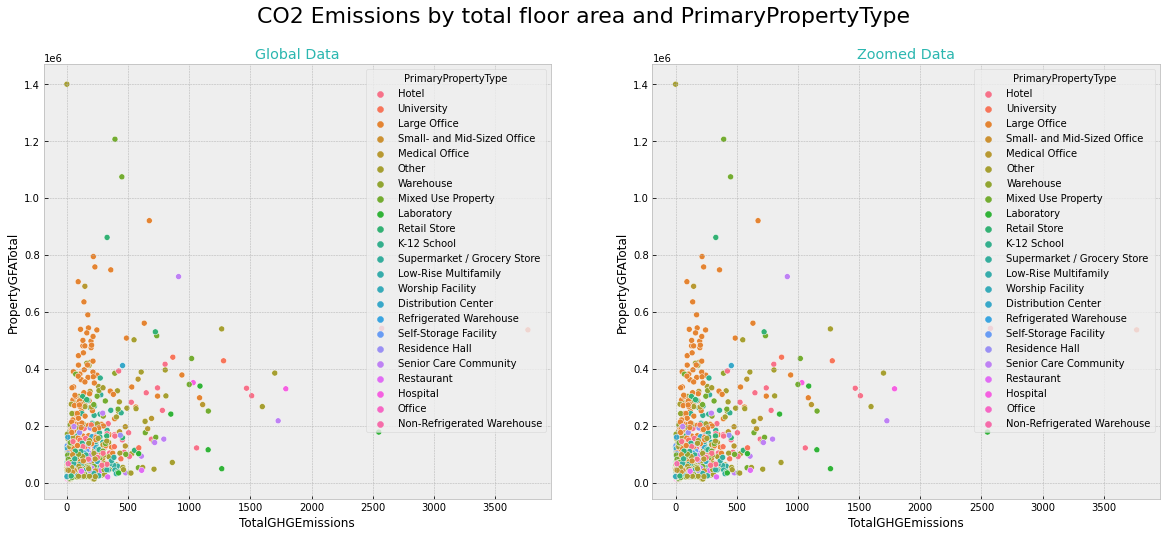

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.scatterplot(data = data, x = 'TotalGHGEmissions', y = 'PropertyGFATotal', hue='PrimaryPropertyType', ax=axes[0])
sns.scatterplot(data = data[data['TotalGHGEmissions'] < 1*10**8], x = 'TotalGHGEmissions', y = 'PropertyGFATotal', hue='PrimaryPropertyType', 
                      ax=axes[1])

axes[0].set_title("Global Data", color='#2cb7b0')
axes[1].set_title("Zoomed Data", color='#2cb7b0')

plt.suptitle('CO2 Emissions by total floor area and PrimaryPropertyType', 
             fontsize=22)
plt.show()

#3 - Final Cleaning

We will eliminate some variables that will not be useful for our modeling and check for incomplete data identified in the initial dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 10 to 1720
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1621 non-null   int64  
 1   DataYear                       1621 non-null   int64  
 2   BuildingType                   1621 non-null   object 
 3   PrimaryPropertyType            1621 non-null   object 
 4   PropertyName                   1621 non-null   object 
 5   Address                        1621 non-null   object 
 6   City                           1621 non-null   object 
 7   State                          1621 non-null   object 
 8   ZipCode                        1605 non-null   object 
 9   TaxParcelIdentificationNumber  1621 non-null   object 
 10  CouncilDistrictCode            1621 non-null   int64  
 11  Neighborhood                   1621 non-null   object 
 12  Latitude                       1621 non-null   

Let's check the ComplianceStatus variable which represents the compliance of the data collected:

In [ ]:
data['ComplianceStatus'].unique()


array(['Compliant', 'Missing Data', 'Error - Correct Default Data',
       'Non-Compliant'], dtype=object)

In [ ]:
print("Lines identified as non-compliant : {}.".format(data[data['ComplianceStatus'] != "Compliant"].shape[0]))


Lines identified as non-compliant : 101.


In [ ]:
data = data[data['ComplianceStatus'] == "Compliant"]


Nous allons ensuite supprimer les variables DefaultData, ComplianceStatus, TaxParcelIdentificationNumber, CouncilDistrictCode, City

In [ ]:
data = data.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

In [ ]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'State', 'ZipCode', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge',
       'harvesine_distance'],
      dtype='object')

In [ ]:
#Delete Identification features

identification_features = ['OSEBuildingID','DataYear','PropertyName', 'Address', 'State', 'ZipCode', 'Latitude', 'Longitude','YearsENERGYSTARCertified']

data_identification = data[identification_features]

data_clean = data.drop(identification_features, axis=1)

In [ ]:
#Binarisation of variables
data_clean['SteamUse(kBtu)_bin'] = (data_clean['SteamUse(kBtu)'] >= data_clean['SteamUse(kBtu)'].median()).astype(int)
data_clean['Electricity(kBtu)_bin'] = (data_clean['Electricity(kBtu)'] >= data_clean['Electricity(kBtu)'].median()).astype(int)
data_clean['NaturalGas(kBtu)_bin'] = (data_clean['NaturalGas(kBtu)'] >= data_clean['NaturalGas(kBtu)'].median()).astype(int)

#Delete consumption records data (Data leakage)

consumption_records = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']
data_clean = data_clean.drop(consumption_records, axis = 1)

data_clean.head()

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge,harvesine_distance,SteamUse(kBtu)_bin,Electricity(kBtu)_bin,NaturalGas(kBtu)_bin
10,NonResidential,Hotel,DOWNTOWN,1.0,11.0,153163,Hotel,Hotel,30.0,119.599999,228.199997,16016644.0,691.26,4.51,47,0.108166,1,1,1
580,NonResidential,University,CENTRAL,1.0,2.0,60122,"College/University, Parking",College/University,NaN,11.500000,32.700001,690529.5,9.31,0.15,100,0.823416,1,0,0
572,NonResidential,Large Office,DOWNTOWN,1.0,13.0,189175,"Office, Other",Office,13.0,115.800003,363.600006,19036416.0,132.71,0.70,95,0.185175,1,1,0
573,NonResidential,Large Office,DOWNTOWN,1.0,13.0,293803,"Office, Parking",Office,25.0,117.400001,368.500000,17074142.0,119.03,0.41,18,0.121118,1,1,0
574,NonResidential,Large Office,DOWNTOWN,1.0,7.0,122356,"Data Center, Office, Retail Store",Office,91.0,41.099998,125.000000,4585070.5,41.80,0.34,106,0.332840,1,1,0


In [ ]:
data_clean.loc[data_clean['NumberofFloors'] == 0, 'GFAPerFloor'] = data_clean.loc[data_clean['NumberofFloors'] == 0, 'PropertyGFATotal']
data_clean.loc[data_clean['NumberofBuildings'] == 0, 'GFAPerBuilding'] = data_clean.loc[data_clean['NumberofBuildings'] == 0, 'PropertyGFATotal']

In [ ]:
#Delete other non relevant

other_columns_deletion = ['GFAPerBuilding', 'GFAPerFloor', 'ListOfAllPropertyUseTypes']

data_clean = data_clean.drop(other_columns_deletion, axis = 1)

In [ ]:
#Cleaning Neighborhood feature
data_clean['Neighborhood'] = data_clean['Neighborhood'].str.lower()
data_clean['Neighborhood'] = data_clean['Neighborhood'].str.replace('delridge neighborhoods', 'delridge')

In [ ]:
data_clean.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'BuildingAge', 'harvesine_distance',
       'SteamUse(kBtu)_bin', 'Electricity(kBtu)_bin', 'NaturalGas(kBtu)_bin'],
      dtype='object')

In [ ]:
#Delete EUI variables

other_variables = ['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']
data_clean = data_clean.drop(other_variables, axis = 1)

In [ ]:
data_clean.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'BuildingAge', 'harvesine_distance',
       'SteamUse(kBtu)_bin', 'Electricity(kBtu)_bin', 'NaturalGas(kBtu)_bin'],
      dtype='object')

# 4 - Export

And finally, we delete the Latitude and Longitude variables and export the cleaned file for modeling in a second Notebook

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/3_Projets OC/Projet 4/raw_data/building-energy-cleaned.csv"

In [ ]:
#Export
data_clean.to_csv(path, index=False)